# Import Dependencies and Data

In [1]:
!pip install -q tensorflow matplotlib tensorflow-datasets ipywidgets

In [2]:
!pip list

Package                                           Version        Editable project location
------------------------------------------------- -------------- -----------------------------------------------------
absl-py                                           0.12.0
aiobotocore                                       2.2.0
aiohttp                                           3.8.1
aioitertools                                      0.8.0
aiosignal                                         1.2.0
ale-py                                            0.7.4
alembic                                           1.4.1
altair                                            4.2.0
anyio                                             3.4.0
appnope                                           0.1.2
argon2-cffi                                       21.3.0
argon2-cffi-bindings                              21.2.0
asgiref                                           3.4.1
astroid                                           2.7.3
ast

pandas-profiling                                  3.1.0
pandocfilters                                     1.5.0
parso                                             0.8.3
partd                                             1.2.0
pathspec                                          0.9.0
patsy                                             0.5.2
pbr                                               5.10.0
pexpect                                           4.8.0
phik                                              0.12.0
pickleshare                                       0.7.5
Pillow                                            9.0.0
pip                                               22.2.2
pkginfo                                           1.8.2
plac                                              1.1.3
platformdirs                                      2.4.1
plotly                                            5.5.0
pluggy                                            1.0.0
pmdarima                                     

wsproto                                           1.0.0
xgboost                                           1.5.1
XlsxWriter                                        3.0.2
yapf                                              0.32.0
yarl                                              1.7.2
yellowbrick                                       1.3.post1
zipp                                              3.7.0


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [4]:
ds= tfds.load("fashion_mnist",split="train")

2022-09-06 11:16:52.384170: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
print(ds.as_numpy_iterator().next().keys()) #['image', 'label']
ds.as_numpy_iterator().next()

2022-09-06 11:16:52.567146: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


dict_keys(['image', 'label'])


2022-09-06 11:16:52.593215: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

# Viz Data and Build Dataset

In [6]:
import numpy as np

In [7]:
detaiterator=ds.as_numpy_iterator()

In [8]:
print(detaiterator.next()["image"].shape) # (28, 28, 1)
detaiterator.next()["image"]

(28, 28, 1)


array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 59],
        [ 77],
        [ 58],
        [ 56],
        [ 58],
        [ 57],
        [ 65],
        [ 89],
        [  2],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [245],
        [213],
        [199],
        [192],
        [188],
        [189],
        [184],
        [226],
        [ 90],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [101],
      

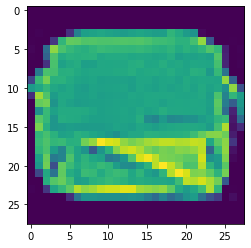

In [9]:
plt.imshow(detaiterator.next()["image"])

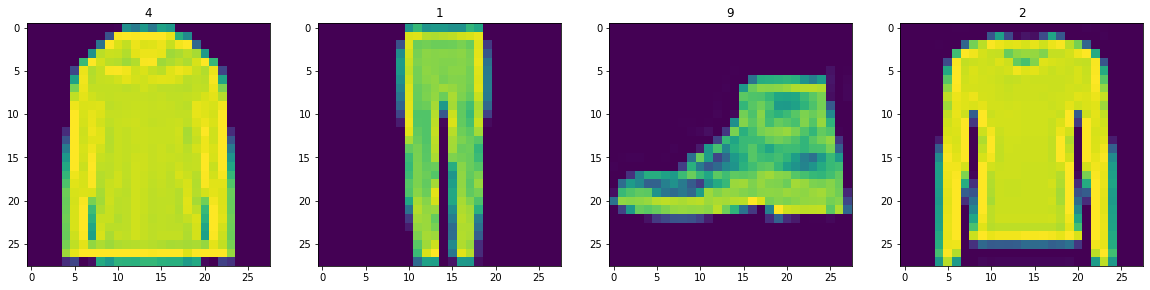

In [10]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample=detaiterator.next()
    ax[idx].imshow(sample["image"])
    ax[idx].title.set_text(sample["label"])

In [11]:
def scale_images(data):
    image=data["image"]
    return image/255

In [12]:
ds=tfds.load("fashion_mnist",split="train")
print(ds)
ds=ds.map(scale_images) #mcshbap
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128) # 128 images per sample
ds=ds.prefetch(64) #reduces the likelihood of bottlenecking

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [13]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Build Neural Network

## Import Modelling Components

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

## Build Generator

In [15]:
def build_sequential():
    
    model= Sequential()

    model.add(Dense(7*7*128,input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding="same"))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,4,padding="same"))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,4,padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1,4,padding="same",activation="sigmoid"))
    
    return model

In [16]:
model=build_sequential()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [23]:
generator=build_sequential()
img=generator.predict(np.random.randn(4,128,1))
img.shape

(4, 28, 28, 1)

0 (28, 28, 1)
..................................
1 (28, 28, 1)
..................................
2 (28, 28, 1)
..................................
3 (28, 28, 1)
..................................


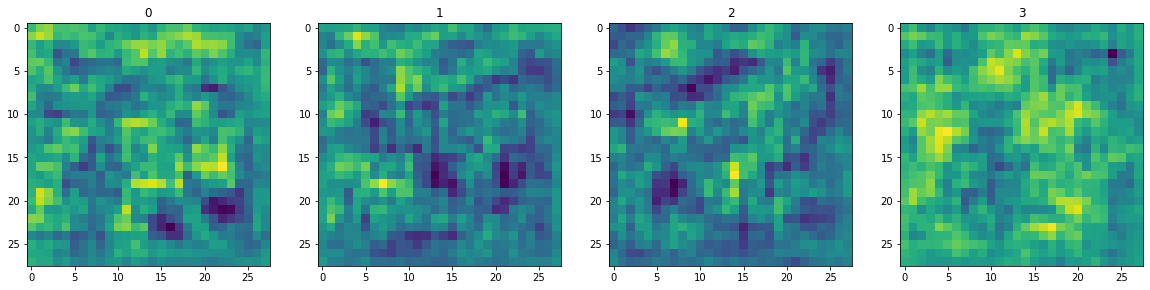

In [29]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx,image in enumerate(img):
    print(idx,image.shape)
#     print(image)
    print("..................................")
    
    ax[idx].imshow(image)
    ax[idx].title.set_text(idx)
    
#image outputs should look better once we train it